## Phase 1

### Header
#### Course Name:  CS 587 Data Intensive and Computing
#### phase #: 1
#### term project name: Crime Data Analysis

#### 1. PROBLEM STATEMENT
 *The aim of this project is to clean the data in a dataset, analyse it and generate a descriptive summary. The cleaned data  is used to generate a descriptive summary for the features and contents.  The dataset used [(NYPD Shooting Incident Data)](https://data.cityofnewyork.us/Public-Safety/NYPD-Shooting-Incident-Data-Historic-/833y-fsy8/data) includes all shooting crimes reported to the New York City Police Department (NYPD) from 2006 to the end of 2019.One among the major crime activities in New York is "shootings" and many have occured until today. The city was expected to finish 2020 with a 14-year high in that category of violence, according to Police Commissioner Dermot Shea.People are not aware of these crimes and even after so many incidents till today and we haven't witnessed any decrease in this count. Victims range from 18 - 65 years old. Our dataset addresses a shooting episode in NYC and incorporates data about the occasion, the area, and season of event. Likewise, data identified with suspect and casualty demographics which we'll be able to obtain useful information for our anlaysis. It will provide a insight to what age category the perpetrators were and who are the major category of victims being attacked.It would also provide information about the crime hotspots of New York City.*



#### 2. Name of your data: 
*NYPD Shooting Incident Dataset*

#### 3. Background:
   + Source: https://data.cityofnewyork.us/Public-Safety/NYPD-Shooting-Incident-Data-Historic-/833y-fsy8/data
   + Time Period: 2006 to 2019
   + Data Unit: Each row is a shooting incident

#### 4 Introduction of dataset

+ *The dataset consists of 19 columns labelled and 21.6K rows. All the information about column features is given in the below table*

|Column label|description|
|-|-|
| INCIDENT_KEY | Randomly generated persistent ID for each arrest |
| OCCUR_DATE | Exact date of the shooting incident|
|OCCUR_TIME | Exact time of the shooting incident|
|BORO| Borough where the shooting incident occurred |
|PRECINCT| Precinct where the shooting incident occurred|
|JURISDICTION_CODE| Jurisdiction where the shooting incident occurred. Jurisdiction codes 0(Patrol), 1(Transit) and 2(Housing) represent NYPD whilst codes 3 and more represent non NYPD jurisdictions|
|LOCATION_DESC | Location of the shooting incident|
|STATISTICAL_MURDER_FLAG | Shooting resulted in the victim’s death which would be counted as a murder|
|PERP_AGE_GROUP| Perpetrator’s age within a category|
|PERP_SEX | Perpetrator’s sex description|
|PERP_RACE |Perpetrator’s race description|
|VIC_AGE_GROUP | Victim’s age within a category|
|VIC_SEX | Victim’s sex description|
|VIC_RACE | Victim’s race description|
|X_COORD_CD| Midblock X-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)|
|Y_COORD_CD | Midblock Y-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)|
|Latitude | Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)|
|Longitude| Longitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)|
|Lon_Lat | Longitude and Latitude Coordinates for mapping|

#### 5 Hypothesis and conclusion 
 
 
*The analysis performed would produce helpful information such as who were the ones affected in these crimes and which place of New York City is the most dangerous and vulnerable for these crimes. This would help people to be aware of the crimes happening in NYC. Most importantly we can derive which race has been affected the most.*


##### 1

In [28]:
# code
import pandas as pd
import seaborn as sns
import numpy as np


In [29]:
data = pd.read_csv('data/NYPD_shooting.csv')

# Task 1 - Removing Duplicates

### It is given in the dataset footnotes that a shooting incident can have multiple victims involved and as a result duplicate INCIDENT_KEY’s are produced. Each INCIDENT_KEY represents a victim but similar duplicate keys are counted as one incident. So, let us check for duplicate rows and remove if any.

In [30]:
# code
count = data['INCIDENT_KEY'].nunique()
print("Number of duplicates in INCIDENT_KEY feature are {}".format(len(data)-count))

Number of duplicates in INCIDENT_KEY feature are 4595


### We have some duplicate rows here, so we have to remove them before cleaning the dataset further

In [31]:
data.drop_duplicates(subset=['INCIDENT_KEY'], inplace=True)

count = data['INCIDENT_KEY'].nunique()
print("Number of duplicates in INCIDENT_KEY feature are {}".format(len(data)-count))

Number of duplicates in INCIDENT_KEY feature are 0


## Task 2 - Convert the object data to categorical data to perform encoding later

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17031 entries, 0 to 21624
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INCIDENT_KEY             17031 non-null  int64  
 1   OCCUR_DATE               17031 non-null  object 
 2   OCCUR_TIME               17031 non-null  object 
 3   BORO                     17031 non-null  object 
 4   PRECINCT                 17031 non-null  int64  
 5   JURISDICTION_CODE        17029 non-null  float64
 6   LOCATION_DESC            7124 non-null   object 
 7   STATISTICAL_MURDER_FLAG  17031 non-null  bool   
 8   PERP_AGE_GROUP           10662 non-null  object 
 9   PERP_SEX                 10692 non-null  object 
 10  PERP_RACE                10692 non-null  object 
 11  VIC_AGE_GROUP            17031 non-null  object 
 12  VIC_SEX                  17031 non-null  object 
 13  VIC_RACE                 17031 non-null  object 
 14  X_COORD_CD            

### Here, we can see that object datatype are PERP_AGE_GROUP, PERP_SEX, VIC_AGE_GROUP, VIC_SEX, VIC_RACE, BORO, LOCATION_DESC. X_COORD and Y_COORD cannot be converted to category data as it does not make sense.

In [33]:
# code
data["PERP_RACE"] = data["PERP_RACE"].astype("category")
data["PERP_AGE_GROUP"] = data["PERP_AGE_GROUP"].astype("category")
data["PERP_SEX"] = data["PERP_SEX"].astype("category")
data["VIC_AGE_GROUP"] = data["VIC_AGE_GROUP"].astype("category")
data["VIC_SEX"] = data["VIC_SEX"].astype("category")
data["VIC_RACE"] = data["VIC_RACE"].astype("category")
data['BORO'] = data['BORO'].astype("category")
data["LOCATION_DESC"] = data["LOCATION_DESC"].astype("category")

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17031 entries, 0 to 21624
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   INCIDENT_KEY             17031 non-null  int64   
 1   OCCUR_DATE               17031 non-null  object  
 2   OCCUR_TIME               17031 non-null  object  
 3   BORO                     17031 non-null  category
 4   PRECINCT                 17031 non-null  int64   
 5   JURISDICTION_CODE        17029 non-null  float64 
 6   LOCATION_DESC            7124 non-null   category
 7   STATISTICAL_MURDER_FLAG  17031 non-null  bool    
 8   PERP_AGE_GROUP           10662 non-null  category
 9   PERP_SEX                 10692 non-null  category
 10  PERP_RACE                10692 non-null  category
 11  VIC_AGE_GROUP            17031 non-null  category
 12  VIC_SEX                  17031 non-null  category
 13  VIC_RACE                 17031 non-null  category
 14  X_COOR

# Task 3 -Let us convert all the categorical feature names to capitals to avoid any duplicate names.

In [34]:
data['BORO'].str.upper()
data['BORO'].cat.categories.tolist()

['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND']

In [35]:
data["PERP_RACE"].str.upper()
data['PERP_RACE'].cat.categories.tolist()

['AMERICAN INDIAN/ALASKAN NATIVE',
 'ASIAN / PACIFIC ISLANDER',
 'BLACK',
 'BLACK HISPANIC',
 'UNKNOWN',
 'WHITE',
 'WHITE HISPANIC']

In [36]:
data["PERP_SEX"].str.upper()
data['PERP_SEX'].cat.categories.tolist()

['F', 'M', 'U']

In [37]:
data["VIC_SEX"].str.upper()
data['VIC_SEX'].cat.categories.tolist()

['F', 'M', 'U']

In [38]:
data["VIC_RACE"].str.upper()
data['VIC_RACE'].cat.categories.tolist()

['AMERICAN INDIAN/ALASKAN NATIVE',
 'ASIAN / PACIFIC ISLANDER',
 'BLACK',
 'BLACK HISPANIC',
 'UNKNOWN',
 'WHITE',
 'WHITE HISPANIC']

In [39]:
data["LOCATION_DESC"].str.upper()
data['LOCATION_DESC'].cat.categories.tolist()

['ATM',
 'BANK',
 'BAR/NIGHT CLUB',
 'BEAUTY/NAIL SALON',
 'CANDY STORE',
 'CHAIN STORE',
 'CHECK CASH',
 'CLOTHING BOUTIQUE',
 'COMMERCIAL BLDG',
 'DEPT STORE',
 'DOCTOR/DENTIST',
 'DRUG STORE',
 'DRY CLEANER/LAUNDRY',
 'FACTORY/WAREHOUSE',
 'FAST FOOD',
 'GAS STATION',
 'GROCERY/BODEGA',
 'GYM/FITNESS FACILITY',
 'HOSPITAL',
 'HOTEL/MOTEL',
 'JEWELRY STORE',
 'LIQUOR STORE',
 'LOAN COMPANY',
 'MULTI DWELL - APT BUILD',
 'MULTI DWELL - PUBLIC HOUS',
 'NONE',
 'PHOTO/COPY STORE',
 'PVT HOUSE',
 'RESTAURANT/DINER',
 'SCHOOL',
 'SHOE STORE',
 'SMALL MERCHANT',
 'SOCIAL CLUB/POLICY LOCATI',
 'STORAGE FACILITY',
 'STORE UNCLASSIFIED',
 'SUPERMARKET',
 'TELECOMM. STORE',
 'VARIETY STORE',
 'VIDEO STORE']

# Task 4 - Removing unnecessary features

### We see that there are some NaN values in the dataset. So, now let us check for the total null values or missing values in the each column

In [40]:
data.isnull().sum()

INCIDENT_KEY                  0
OCCUR_DATE                    0
OCCUR_TIME                    0
BORO                          0
PRECINCT                      0
JURISDICTION_CODE             2
LOCATION_DESC              9907
STATISTICAL_MURDER_FLAG       0
PERP_AGE_GROUP             6369
PERP_SEX                   6339
PERP_RACE                  6339
VIC_AGE_GROUP                 0
VIC_SEX                       0
VIC_RACE                      0
X_COORD_CD                    0
Y_COORD_CD                    0
Latitude                      0
Longitude                     0
Lon_Lat                       0
dtype: int64

In [41]:
data.isnull().mean()*100 #percentage of missing data

INCIDENT_KEY                0.000000
OCCUR_DATE                  0.000000
OCCUR_TIME                  0.000000
BORO                        0.000000
PRECINCT                    0.000000
JURISDICTION_CODE           0.011743
LOCATION_DESC              58.170395
STATISTICAL_MURDER_FLAG     0.000000
PERP_AGE_GROUP             37.396512
PERP_SEX                   37.220363
PERP_RACE                  37.220363
VIC_AGE_GROUP               0.000000
VIC_SEX                     0.000000
VIC_RACE                    0.000000
X_COORD_CD                  0.000000
Y_COORD_CD                  0.000000
Latitude                    0.000000
Longitude                   0.000000
Lon_Lat                     0.000000
dtype: float64

### Almost 60 percent of the LOCATION_DESC data is missing, so it does not make sense to replace the missing data with mode of the category. So, let us remove this feature from the dataset

In [42]:
data.drop(['LOCATION_DESC'],inplace=True,axis=1)
data.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,201575314,08/23/2019,22:10:00,QUEENS,103,0.0,False,NaN,NaN,NaN,25-44,M,BLACK,1037451,193561,40.697805,-73.808141,POINT (-73.80814071699996 40.697805308000056)
1,205748546,11/27/2019,15:54:00,BRONX,40,0.0,False,<18,M,BLACK,25-44,F,BLACK,1006789,237559,40.818700,-73.918571,POINT (-73.91857061799993 40.81869973000005)
2,193118596,02/02/2019,19:40:00,MANHATTAN,23,0.0,False,18-24,M,WHITE HISPANIC,18-24,M,BLACK HISPANIC,999347,227795,40.791916,-73.945480,POINT (-73.94547965999999 40.791916091000076)
3,204192600,10/24/2019,00:52:00,STATEN ISLAND,121,0.0,True,25-44,M,BLACK,25-44,F,BLACK,938149,171781,40.638064,-74.166108,POINT (-74.16610830199996 40.63806398200006)
4,201483468,08/22/2019,18:03:00,BRONX,46,0.0,False,25-44,M,BLACK HISPANIC,18-24,M,BLACK,1008224,250621,40.854547,-73.913339,POINT (-73.91333944399999 40.85454734900003)


# Task 5 - Dealing with missing values

### Now, Replace NaN values of other features of categorical data with mode of the category

In [43]:
data.mode(axis=0).head(1)

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,9953245,09/04/2011,23:30:00,BROOKLYN,75.0,0.0,False,18-24,M,BLACK,25-44,M,BLACK,1026387,183623,40.887451,-73.847608,POINT (-73.84760778699997 40.88745131300004)


In [44]:
for column in data.columns:
    data[column].fillna(data[column].mode()[0], inplace=True)
    
data.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,201575314,08/23/2019,22:10:00,QUEENS,103,0.0,False,18-24,M,BLACK,25-44,M,BLACK,1037451,193561,40.697805,-73.808141,POINT (-73.80814071699996 40.697805308000056)
1,205748546,11/27/2019,15:54:00,BRONX,40,0.0,False,<18,M,BLACK,25-44,F,BLACK,1006789,237559,40.818700,-73.918571,POINT (-73.91857061799993 40.81869973000005)
2,193118596,02/02/2019,19:40:00,MANHATTAN,23,0.0,False,18-24,M,WHITE HISPANIC,18-24,M,BLACK HISPANIC,999347,227795,40.791916,-73.945480,POINT (-73.94547965999999 40.791916091000076)
3,204192600,10/24/2019,00:52:00,STATEN ISLAND,121,0.0,True,25-44,M,BLACK,25-44,F,BLACK,938149,171781,40.638064,-74.166108,POINT (-74.16610830199996 40.63806398200006)
4,201483468,08/22/2019,18:03:00,BRONX,46,0.0,False,25-44,M,BLACK HISPANIC,18-24,M,BLACK,1008224,250621,40.854547,-73.913339,POINT (-73.91333944399999 40.85454734900003)


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17031 entries, 0 to 21624
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   INCIDENT_KEY             17031 non-null  int64   
 1   OCCUR_DATE               17031 non-null  object  
 2   OCCUR_TIME               17031 non-null  object  
 3   BORO                     17031 non-null  category
 4   PRECINCT                 17031 non-null  int64   
 5   JURISDICTION_CODE        17031 non-null  float64 
 6   STATISTICAL_MURDER_FLAG  17031 non-null  bool    
 7   PERP_AGE_GROUP           17031 non-null  category
 8   PERP_SEX                 17031 non-null  category
 9   PERP_RACE                17031 non-null  category
 10  VIC_AGE_GROUP            17031 non-null  category
 11  VIC_SEX                  17031 non-null  category
 12  VIC_RACE                 17031 non-null  category
 13  X_COORD_CD               17031 non-null  object  
 14  Y_COOR

# Task 6 - Removing 'UNKNOWN' categories from the features

In [46]:
data['BORO'].value_counts()

BROOKLYN         7186
BRONX            4712
QUEENS           2557
MANHATTAN        2063
STATEN ISLAND     513
Name: BORO, dtype: int64

In [47]:
data['PERP_RACE'].value_counts()

BLACK                             13258
UNKNOWN                            1617
WHITE HISPANIC                     1213
BLACK HISPANIC                      692
WHITE                               188
ASIAN / PACIFIC ISLANDER             61
AMERICAN INDIAN/ALASKAN NATIVE        2
Name: PERP_RACE, dtype: int64

### In the above list, we have seen that there is an "UNKNOWN" category in 'PERP_RACE'. So, we can safely remove these data as it comprises only small percentage of data

In [48]:
index_names = data[ data['PERP_RACE'] == 'UNKNOWN'].index 
data.drop(index_names, axis=0,inplace=True)
data['PERP_RACE'].value_counts()

BLACK                             13258
WHITE HISPANIC                     1213
BLACK HISPANIC                      692
WHITE                               188
ASIAN / PACIFIC ISLANDER             61
AMERICAN INDIAN/ALASKAN NATIVE        2
UNKNOWN                               0
Name: PERP_RACE, dtype: int64

### Same with 'PERP_SEX', 'PERP_RACE', 'VIC_SEX', 'VIC_RACE'

In [49]:
index_names = data[ data['PERP_SEX'] == 'U'].index 
data.drop(index_names, axis=0,inplace=True)
data['PERP_SEX'].value_counts()

M    15236
F      160
U        0
Name: PERP_SEX, dtype: int64

In [50]:
index_names = data[ data['VIC_SEX'] == 'U'].index 
data.drop(index_names, axis=0,inplace=True)
data['VIC_SEX'].value_counts()

M    14235
F     1153
U        0
Name: VIC_SEX, dtype: int64

In [51]:
index_names = data[ data['VIC_RACE'] == 'UNKNOWN'].index 
data.drop(index_names, axis=0,inplace=True)
data['VIC_RACE'].value_counts()

BLACK                             11239
WHITE HISPANIC                     2047
BLACK HISPANIC                     1429
WHITE                               412
ASIAN / PACIFIC ISLANDER            199
AMERICAN INDIAN/ALASKAN NATIVE        6
UNKNOWN                               0
Name: VIC_RACE, dtype: int64

In [52]:
data['VIC_AGE_GROUP'].cat.categories.tolist()

['18-24', '25-44', '45-64', '65+', '<18', 'UNKNOWN']

In [53]:
index_names = data[ data['VIC_AGE_GROUP'] == 'UNKNOWN'].index 
data.drop(index_names, axis=0,inplace=True)

data['VIC_AGE_GROUP'].value_counts()

25-44      6770
18-24      5920
<18        1528
45-64       988
65+         103
UNKNOWN       0
Name: VIC_AGE_GROUP, dtype: int64

In [54]:
data['PERP_AGE_GROUP'].cat.categories.tolist()

['1020', '18-24', '224', '25-44', '45-64', '65+', '940', '<18', 'UNKNOWN']

### Age range '1020', '940', '224' also does not make sense. So, we have to remove these from the dataset

In [55]:
index_names = data[ data['PERP_AGE_GROUP'] == 'UNKNOWN'].index 
data.drop(index_names, axis=0,inplace=True)

index_names = data[ data['PERP_AGE_GROUP'] == '1020'].index 
data.drop(index_names, axis=0,inplace=True)

index_names = data[ data['PERP_AGE_GROUP'] == '940'].index 
data.drop(index_names, axis=0,inplace=True)

index_names = data[ data['PERP_AGE_GROUP'] == '224'].index 
data.drop(index_names, axis=0,inplace=True)

data['PERP_AGE_GROUP'].value_counts()

18-24      9892
25-44      2979
<18         870
45-64       284
65+          35
1020          0
224           0
940           0
UNKNOWN       0
Name: PERP_AGE_GROUP, dtype: int64

# Task 7 - Convert the date and time format to datetime64 datatype

In [56]:
# code
data['OCCUR_DATE'] = pd.to_datetime(data['OCCUR_DATE'])
data['OCCUR_TIME'] = pd.to_datetime(data['OCCUR_TIME'])

In [57]:
data.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,201575314,2019-08-23,2021-02-27 22:10:00,QUEENS,103,0.0,False,18-24,M,BLACK,25-44,M,BLACK,1037451,193561,40.697805,-73.808141,POINT (-73.80814071699996 40.697805308000056)
1,205748546,2019-11-27,2021-02-27 15:54:00,BRONX,40,0.0,False,<18,M,BLACK,25-44,F,BLACK,1006789,237559,40.818700,-73.918571,POINT (-73.91857061799993 40.81869973000005)
2,193118596,2019-02-02,2021-02-27 19:40:00,MANHATTAN,23,0.0,False,18-24,M,WHITE HISPANIC,18-24,M,BLACK HISPANIC,999347,227795,40.791916,-73.945480,POINT (-73.94547965999999 40.791916091000076)
3,204192600,2019-10-24,2021-02-27 00:52:00,STATEN ISLAND,121,0.0,True,25-44,M,BLACK,25-44,F,BLACK,938149,171781,40.638064,-74.166108,POINT (-74.16610830199996 40.63806398200006)
4,201483468,2019-08-22,2021-02-27 18:03:00,BRONX,46,0.0,False,25-44,M,BLACK HISPANIC,18-24,M,BLACK,1008224,250621,40.854547,-73.913339,POINT (-73.91333944399999 40.85454734900003)


# Task 8 - Now, let us split the date to different columns like day, month and year to better understand the data

In [58]:
# code
data['DAY'] = data['OCCUR_DATE'].dt.day
data['MONTH'] = data['OCCUR_DATE'].dt.month
data['YEAR'] = data['OCCUR_DATE'].dt.year


### Day of the month does not make much sense and we cannot draw any insights. So, let us convert the day into Weekday of the week.

In [59]:
def weekDay(a):
    return a.strftime('%A')

data['WEEKDAY'] = data['OCCUR_DATE'].apply(lambda x : weekDay(x))

### Now, let us split the time to different columns like hours, minutes and seconds to better understand the data

In [60]:
# code
data['time_HOUR'] = data['OCCUR_TIME'].dt.hour
data['time_MINUTE'] = data['OCCUR_TIME'].dt.minute
data['time_SECOND'] = data['OCCUR_TIME'].dt.second

In [61]:
data.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,...,Latitude,Longitude,Lon_Lat,DAY,MONTH,YEAR,WEEKDAY,time_HOUR,time_MINUTE,time_SECOND
0,201575314,2019-08-23,2021-02-27 22:10:00,QUEENS,103,0.0,False,18-24,M,BLACK,...,40.697805,-73.808141,POINT (-73.80814071699996 40.697805308000056),23,8,2019,Friday,22,10,0
1,205748546,2019-11-27,2021-02-27 15:54:00,BRONX,40,0.0,False,<18,M,BLACK,...,40.818700,-73.918571,POINT (-73.91857061799993 40.81869973000005),27,11,2019,Wednesday,15,54,0
2,193118596,2019-02-02,2021-02-27 19:40:00,MANHATTAN,23,0.0,False,18-24,M,WHITE HISPANIC,...,40.791916,-73.945480,POINT (-73.94547965999999 40.791916091000076),2,2,2019,Saturday,19,40,0
3,204192600,2019-10-24,2021-02-27 00:52:00,STATEN ISLAND,121,0.0,True,25-44,M,BLACK,...,40.638064,-74.166108,POINT (-74.16610830199996 40.63806398200006),24,10,2019,Thursday,0,52,0
4,201483468,2019-08-22,2021-02-27 18:03:00,BRONX,46,0.0,False,25-44,M,BLACK HISPANIC,...,40.854547,-73.913339,POINT (-73.91333944399999 40.85454734900003),22,8,2019,Thursday,18,3,0


# Task 9 - Now that we have our time and date data in other new columns, we can drop the 'OCCUR_DATE' and 'OCCUR_TIME' data

In [62]:
data.drop(['OCCUR_DATE','OCCUR_TIME'],inplace=True,axis=1)
data.head()

,INCIDENT_KEY,BORO,PRECINCT,JURISDICTION_CODE,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,...,Latitude,Longitude,Lon_Lat,DAY,MONTH,YEAR,WEEKDAY,time_HOUR,time_MINUTE,time_SECOND
0,201575314,QUEENS,103,0.0,False,18-24,M,BLACK,25-44,M,...,40.697805,-73.808141,POINT (-73.80814071699996 40.697805308000056),23,8,2019,Friday,22,10,0
1,205748546,BRONX,40,0.0,False,<18,M,BLACK,25-44,F,...,40.818700,-73.918571,POINT (-73.91857061799993 40.81869973000005),27,11,2019,Wednesday,15,54,0
2,193118596,MANHATTAN,23,0.0,False,18-24,M,WHITE HISPANIC,18-24,M,...,40.791916,-73.945480,POINT (-73.94547965999999 40.791916091000076),2,2,2019,Saturday,19,40,0
3,204192600,STATEN ISLAND,121,0.0,True,25-44,M,BLACK,25-44,F,...,40.638064,-74.166108,POINT (-74.16610830199996 40.63806398200006),24,10,2019,Thursday,0,52,0
4,201483468,BRONX,46,0.0,False,25-44,M,BLACK HISPANIC,18-24,M,...,40.854547,-73.913339,POINT (-73.91333944399999 40.85454734900003),22,8,2019,Thursday,18,3,0


# Task 10 -  Here, we can see that age column is described in the form of categories like "18-24", "<18".....etc., we will split these ranges into two separate columns and find the mean of them.

In [63]:
data['PERP_AGE_GROUP'].value_counts()

18-24      9892
25-44      2979
<18         870
45-64       284
65+          35
1020          0
224           0
940           0
UNKNOWN       0
Name: PERP_AGE_GROUP, dtype: int64

In [64]:
data['PERP_AGE_GROUP'] = data['PERP_AGE_GROUP'].replace(to_replace ="65+", value = 
"65-100")
data['PERP_AGE_GROUP'] = data['PERP_AGE_GROUP'].replace(to_replace ="<18", value = 
"0-18")

In [65]:

data[['AGE_GROUP_MIN', 'AGE_GROUP_MAX']] = data['PERP_AGE_GROUP'].str.split('-|<', 1, expand=True)
data["AGE_GROUP_MIN"] = data["AGE_GROUP_MIN"].astype("int")
data["AGE_GROUP_MAX"] = data["AGE_GROUP_MAX"].astype("int")

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14060 entries, 0 to 21624
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   INCIDENT_KEY             14060 non-null  int64   
 1   BORO                     14060 non-null  category
 2   PRECINCT                 14060 non-null  int64   
 3   JURISDICTION_CODE        14060 non-null  float64 
 4   STATISTICAL_MURDER_FLAG  14060 non-null  bool    
 5   PERP_AGE_GROUP           14060 non-null  category
 6   PERP_SEX                 14060 non-null  category
 7   PERP_RACE                14060 non-null  category
 8   VIC_AGE_GROUP            14060 non-null  category
 9   VIC_SEX                  14060 non-null  category
 10  VIC_RACE                 14060 non-null  category
 11  X_COORD_CD               14060 non-null  object  
 12  Y_COORD_CD               14060 non-null  object  
 13  Latitude                 14060 non-null  float64 
 14  Longit

In [67]:
data['AGE_MEAN'] = (data['AGE_GROUP_MIN']+data['AGE_GROUP_MAX'])/2

In [68]:
data.head()

,INCIDENT_KEY,BORO,PRECINCT,JURISDICTION_CODE,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,...,DAY,MONTH,YEAR,WEEKDAY,time_HOUR,time_MINUTE,time_SECOND,AGE_GROUP_MIN,AGE_GROUP_MAX,AGE_MEAN
0,201575314,QUEENS,103,0.0,False,18-24,M,BLACK,25-44,M,...,23,8,2019,Friday,22,10,0,18,24,21.0
1,205748546,BRONX,40,0.0,False,0-18,M,BLACK,25-44,F,...,27,11,2019,Wednesday,15,54,0,0,18,9.0
2,193118596,MANHATTAN,23,0.0,False,18-24,M,WHITE HISPANIC,18-24,M,...,2,2,2019,Saturday,19,40,0,18,24,21.0
3,204192600,STATEN ISLAND,121,0.0,True,25-44,M,BLACK,25-44,F,...,24,10,2019,Thursday,0,52,0,25,44,34.5
4,201483468,BRONX,46,0.0,False,25-44,M,BLACK HISPANIC,18-24,M,...,22,8,2019,Thursday,18,3,0,25,44,34.5


# Task 11 - Check if the data is skewed 

<AxesSubplot:xlabel='PERP_RACE', ylabel='count'>

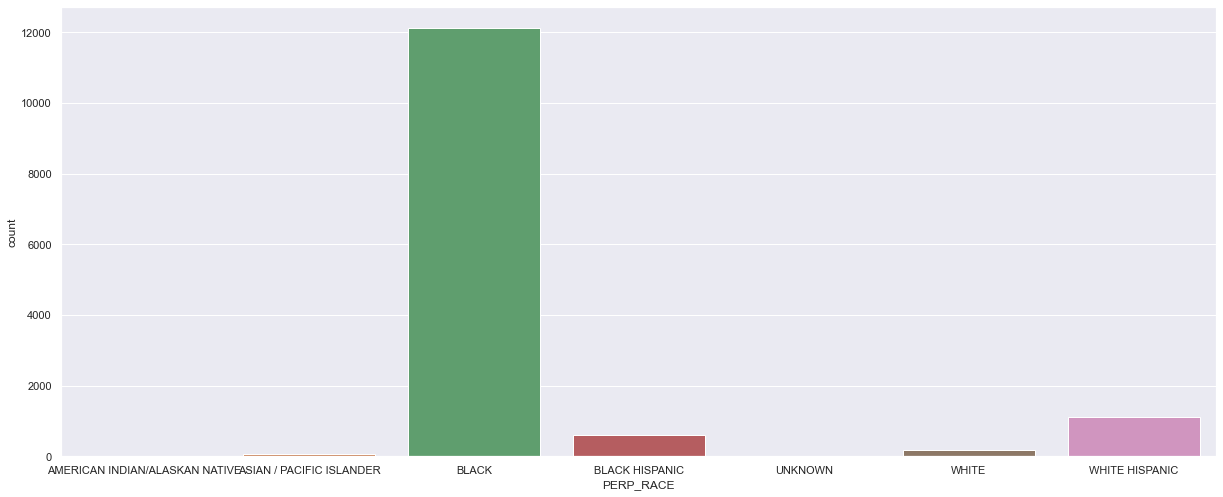

In [69]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.countplot(x='PERP_RACE',data=data)

### We can see that data is skewed with 'PERP_RACE' of 'BLACK', However, we choose not to remove any skewed data as we might lose some insights. Same with the following features also.

['M', 'F']
Categories (2, object): ['M', 'F']


<AxesSubplot:xlabel='PERP_SEX', ylabel='count'>

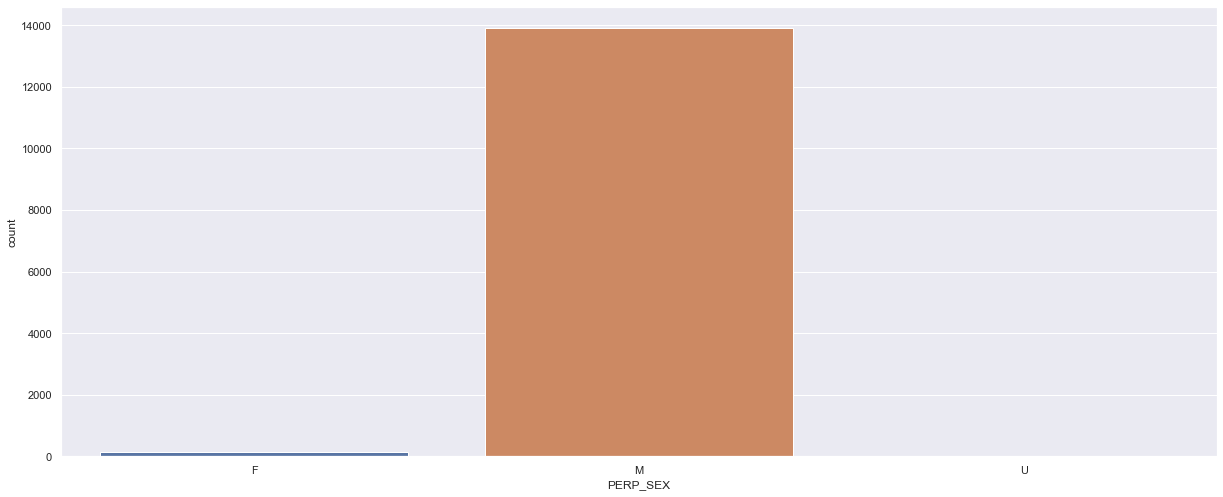

In [70]:
print(data['PERP_SEX'].unique())
sns.countplot(x='PERP_SEX',data=data)

<AxesSubplot:xlabel='VIC_RACE', ylabel='count'>

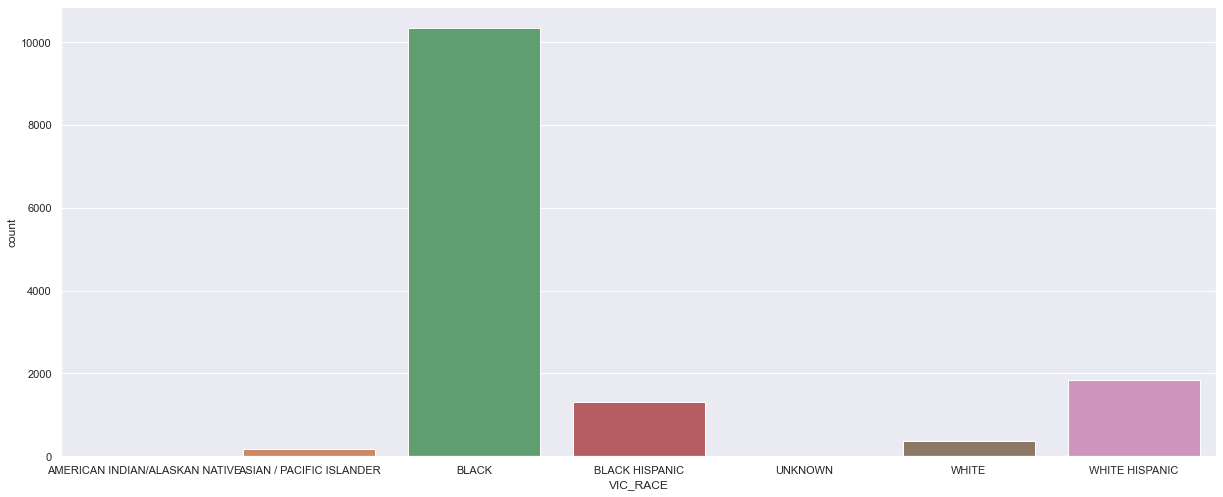

In [71]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.countplot(x='VIC_RACE',data=data)

<AxesSubplot:xlabel='VIC_SEX', ylabel='count'>

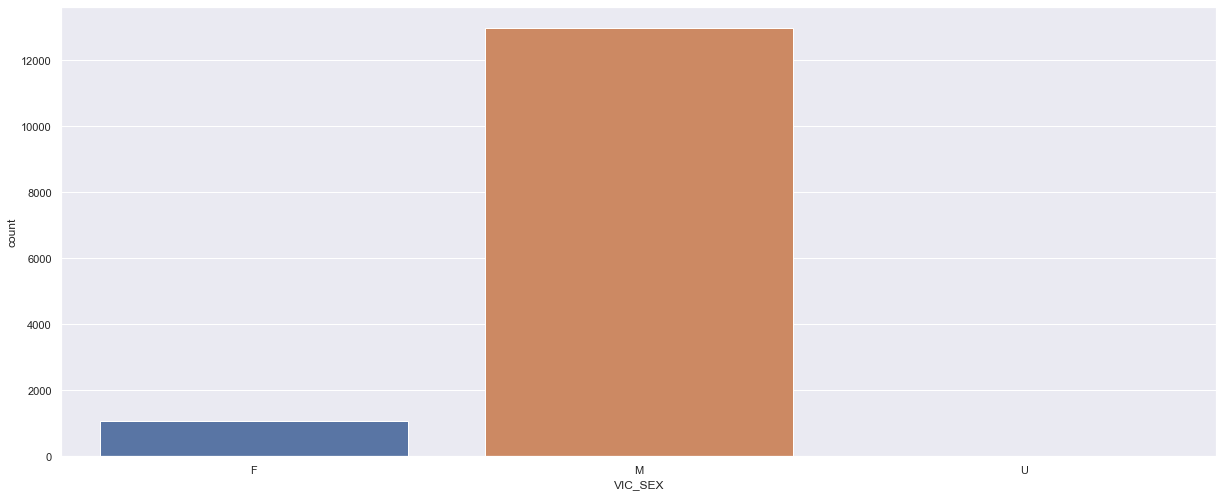

In [72]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.countplot(x='VIC_SEX',data=data)

# Task 12 - Encoding the categorical data with numerics

In [73]:
# code
data["PERP_AGE_GROUP"] = data["PERP_AGE_GROUP"].cat.codes
data["PERP_SEX"] = data["PERP_SEX"].cat.codes
data["PERP_RACE"] = data["PERP_RACE"].cat.codes
data["VIC_AGE_GROUP"] = data["VIC_AGE_GROUP"].cat.codes
data["VIC_SEX"] = data["VIC_SEX"].cat.codes
data["VIC_RACE"] = data["VIC_RACE"].cat.codes
data["BORO"] = data["BORO"].cat.codes
data["STATISTICAL_MURDER_FLAG"] = data["STATISTICAL_MURDER_FLAG"].astype("category")
data["STATISTICAL_MURDER_FLAG"] = data["STATISTICAL_MURDER_FLAG"].cat.codes


In [74]:
data.head()

,INCIDENT_KEY,BORO,PRECINCT,JURISDICTION_CODE,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,...,DAY,MONTH,YEAR,WEEKDAY,time_HOUR,time_MINUTE,time_SECOND,AGE_GROUP_MIN,AGE_GROUP_MAX,AGE_MEAN
0,201575314,3,103,0.0,0,1,1,2,1,1,...,23,8,2019,Friday,22,10,0,18,24,21.0
1,205748546,0,40,0.0,0,7,1,2,1,0,...,27,11,2019,Wednesday,15,54,0,0,18,9.0
2,193118596,2,23,0.0,0,1,1,6,0,1,...,2,2,2019,Saturday,19,40,0,18,24,21.0
3,204192600,4,121,0.0,1,3,1,2,1,0,...,24,10,2019,Thursday,0,52,0,25,44,34.5
4,201483468,0,46,0.0,0,3,1,3,0,1,...,22,8,2019,Thursday,18,3,0,25,44,34.5


In [75]:
data.describe()

,INCIDENT_KEY,BORO,PRECINCT,JURISDICTION_CODE,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,...,Longitude,DAY,MONTH,YEAR,time_HOUR,time_MINUTE,time_SECOND,AGE_GROUP_MIN,AGE_GROUP_MAX,AGE_MEAN
count,1.406000e+04,14060.000000,14060.000000,14060.000000,14060.000000,14060.000000,14060.000000,14060.000000,14060.000000,14060.000000,...,14060.000000,14060.000000,14060.000000,14060.000000,14060.000000,14060.000000,14060.0,14060.000000,14060.000000,14060.000000
mean,1.020239e+08,1.238265,66.694595,0.346515,0.201636,1.865576,0.989260,2.389545,0.988407,0.923044,...,-73.910201,16.011166,6.815292,2012.322262,12.185491,28.090541,0.0,19.031721,28.863442,23.947582
std,5.174664e+07,1.111144,27.035051,0.755367,0.401236,1.596148,0.103078,1.122913,1.164691,0.266531,...,0.067830,8.920651,3.166294,3.718190,8.470424,17.428602,0.0,7.042269,10.489539,8.421737
min,9.953245e+06,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,-74.249304,1.000000,1.000000,2006.000000,0.000000,0.000000,0.0,0.000000,18.000000,9.000000
25%,6.924852e+07,0.000000,44.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000,1.000000,...,-73.943612,8.000000,4.000000,2009.000000,3.000000,14.000000,0.0,18.000000,24.000000,21.000000
50%,8.635021e+07,1.000000,69.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,-73.916404,16.000000,7.000000,2012.000000,15.000000,30.000000,0.0,18.000000,24.000000,21.000000
75%,1.464628e+08,2.000000,81.000000,0.000000,0.000000,3.000000,1.000000,2.000000,1.000000,1.000000,...,-73.882759,24.000000,9.000000,2015.000000,20.000000,43.000000,0.0,18.000000,24.000000,21.000000
max,2.068919e+08,4.000000,123.000000,2.000000,1.000000,7.000000,1.000000,6.000000,4.000000,1.000000,...,-73.702048,31.000000,12.000000,2019.000000,23.000000,59.000000,0.0,65.000000,100.000000,82.500000


### Saving the dataset

In [76]:
data.to_csv('cleaned_NYPD.csv',index=False)